1. Import Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donn√©es
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# 
df.shape

# Afficher les premi√®res et derni√®res lignes
df.head()
df.tail()

# V√©rifier la taille du dataset
print(f"Shape du dataset: {df.shape}")

# V√©rifier les noms des colonnes
print(f"Noms des colonnes: {df.columns}")

# Obtenir un aper√ßu g√©n√©ral des types de donn√©es et des valeurs manquantes
df.info()

# V√©rifier le type des colonnes
df.dtypes

# 
n = 10  # Nombre d'√©chantillons souhait√©s
df.sample(n)


# V√©rifier la pr√©sence de valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Shape du dataset: (30616, 46)
Noms des colonnes: Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal',
       'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electric

NumberofFloors                        83
NumberofBuildings                    294
ENERGYSTARScore                     7917
SiteEUIWN(kBtu/sf)                  1166
SiteEUI(kBtu/sf)                     856
SiteEnergyUse(kBtu)                  851
SiteEnergyUseWN(kBtu)               1161
SourceEUIWN(kBtu/sf)                1166
SourceEUI(kBtu/sf)                   856
LargestPropertyUseType                 8
LargestPropertyUseTypeGFA              3
SecondLargestPropertyUseType       13102
SecondLargestPropertyUseTypeGFA    13102
ThirdLargestPropertyUseType        23927
ThirdLargestPropertyUseTypeGFA     24088
Electricity(kWh)                     541
SteamUse(kBtu)                     29559
NaturalGas(therms)                 11448
ComplianceIssue                      345
Electricity(kBtu)                    541
NaturalGas(kBtu)                   11448
TotalGHGEmissions                    457
GHGEmissionsIntensity                459
dtype: int64

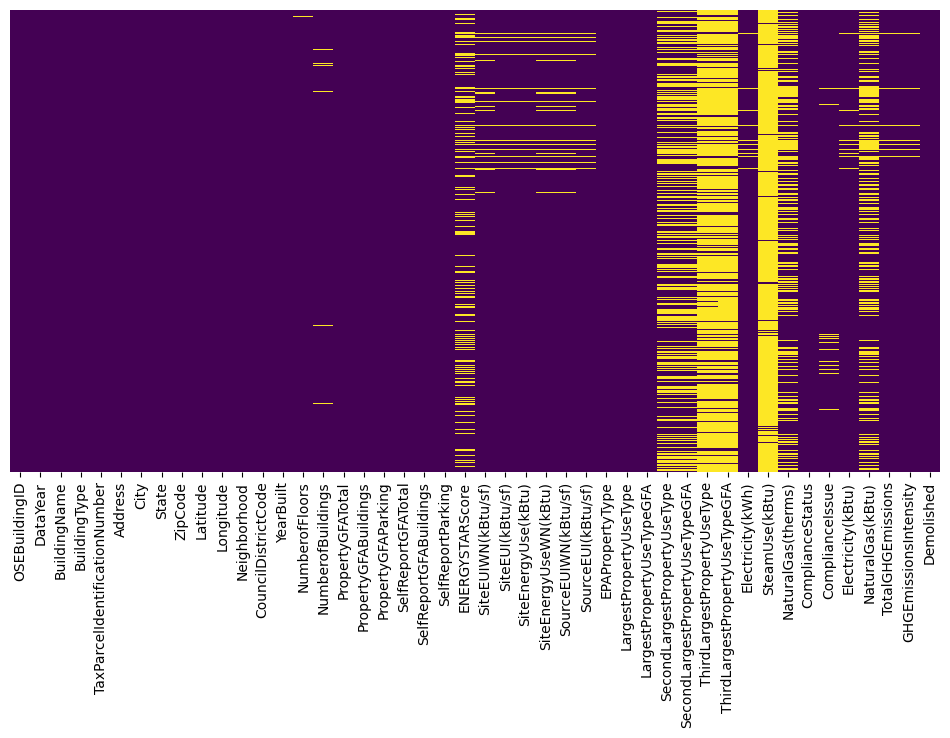

In [16]:
#Visualiser les valeurs manquantes avec un heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()



üìä Pourcentage de valeurs manquantes par colonne avant traitement :
SteamUse(kBtu)                     96.547557
ThirdLargestPropertyUseTypeGFA     78.677816
ThirdLargestPropertyUseType        78.151947
SecondLargestPropertyUseType       42.794617
SecondLargestPropertyUseTypeGFA    42.794617
NaturalGas(kBtu)                   37.392213
NaturalGas(therms)                 37.392213
ENERGYSTARScore                    25.859028
SiteEUIWN(kBtu/sf)                  3.808466
SourceEUIWN(kBtu/sf)                3.808466
SiteEnergyUseWN(kBtu)               3.792135
SiteEUI(kBtu/sf)                    2.795924
SourceEUI(kBtu/sf)                  2.795924
SiteEnergyUse(kBtu)                 2.779592
Electricity(kBtu)                   1.767050
Electricity(kWh)                    1.767050
GHGEmissionsIntensity               1.499216
TotalGHGEmissions                   1.492684
ComplianceIssue                     1.126862
NumberofBuildings                   0.960282
NumberofFloors               

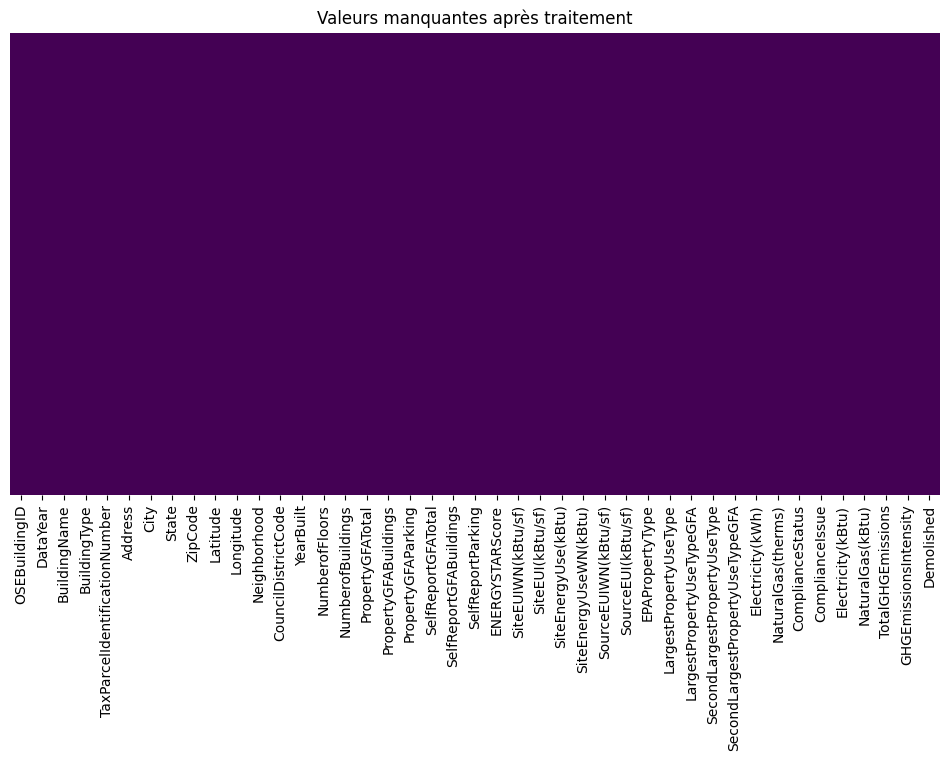

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ V√©rification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nüìä Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2Ô∏è‚É£ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\nüóëÔ∏è Colonnes supprim√©es ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"üîÑ Nouvelle shape du dataset apr√®s suppression : {df.shape}")

# 3Ô∏è‚É£ Imputation des valeurs num√©riques manquantes (m√©diane)
num_cols = df.select_dtypes(include=['number']).columns  # S√©lection automatique des colonnes num√©riques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n‚úÖ Imputation des valeurs num√©riques avec la m√©diane termin√©e.")

# 4Ô∏è‚É£ Imputation des valeurs cat√©goriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # S√©lection automatique des colonnes cat√©goriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n‚úÖ Imputation des valeurs cat√©goriques termin√©e.")

# 5Ô∏è‚É£ V√©rification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\nüîç V√©rification finale des valeurs manquantes apr√®s traitement :")
if remaining_missing.empty:
    print("‚úÖ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# üìä Visualisation des valeurs manquantes apr√®s traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes apr√®s traitement")
plt.show()


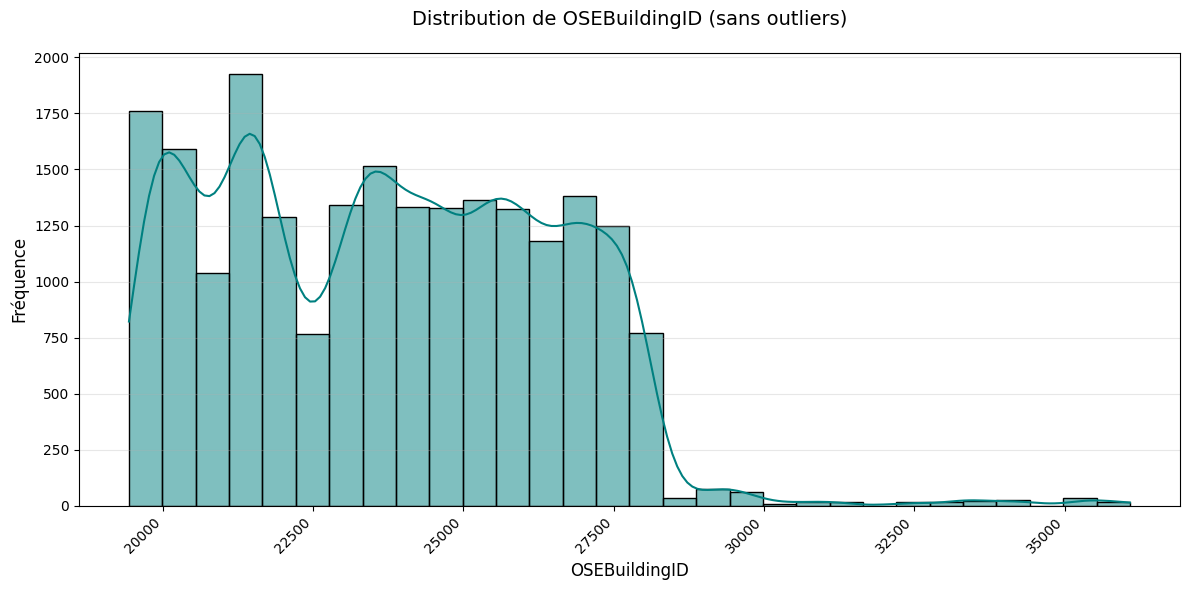

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# D√©sactiver les warnings
import warnings
warnings.filterwarnings("ignore")

def remove_outliers(series):
    """Supprime les outliers en utilisant la m√©thode IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Supprimer les colonnes non informatives
single_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
df_clean = df.drop(columns=single_value_cols)

# Afficher les distributions pour les colonnes restantes
for col in df_clean.columns:
    unique_count = df_clean[col].nunique()
    
    if unique_count < 2:
        print(f"Ignorer la colonne '{col}' : elle a moins de 2 valeurs uniques.")
        continue
    
    plt.figure(figsize=(12, 6))  # Taille augment√©e
    
    if unique_count < 5:
        # Diagramme en barres pour les variables discr√®tes
        value_counts = df_clean[col].value_counts()
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis', edgecolor='black')
        
        # Ajouter les valeurs sur les barres
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points',
                        fontsize=10)
        
        plt.title(f"R√©partition de {col} (valeurs discr√®tes)", fontsize=14, pad=20)
        plt.xlabel("")
        plt.ylabel("Nombre d'occurrences", fontsize=12)
        plt.xticks(
            rotation=45, 
            ha='right', 
            fontsize=10  # Taille de police r√©duite
        )
        plt.subplots_adjust(bottom=0.25)  # Espacement accru pour les labels
        
    else:
        # V√©rifier si la colonne est num√©rique avant de supprimer les outliers
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            # Histogramme pour les variables continues (sans outliers)
            filtered_data = df_clean[col][remove_outliers(df_clean[col])]
            
            sns.histplot(
                filtered_data, 
                bins=30, 
                kde=True, 
                color='teal', 
                edgecolor='black',
                binrange=(filtered_data.min(), filtered_data.max())  # Plage ajust√©e
            )
            
            plt.title(f"Distribution de {col} (sans outliers)", fontsize=14, pad=20)
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Fr√©quence", fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation m√™me pour les nombres
        else:
            # Si la colonne n'est pas num√©rique, afficher un message
            print(f"Ignorer la colonne '{col}' : elle n'est pas num√©rique.")
            continue
    
    plt.grid(axis='y', alpha=0.3)  # Grille horizontale discr√®te
    plt.tight_layout()
    plt.show()

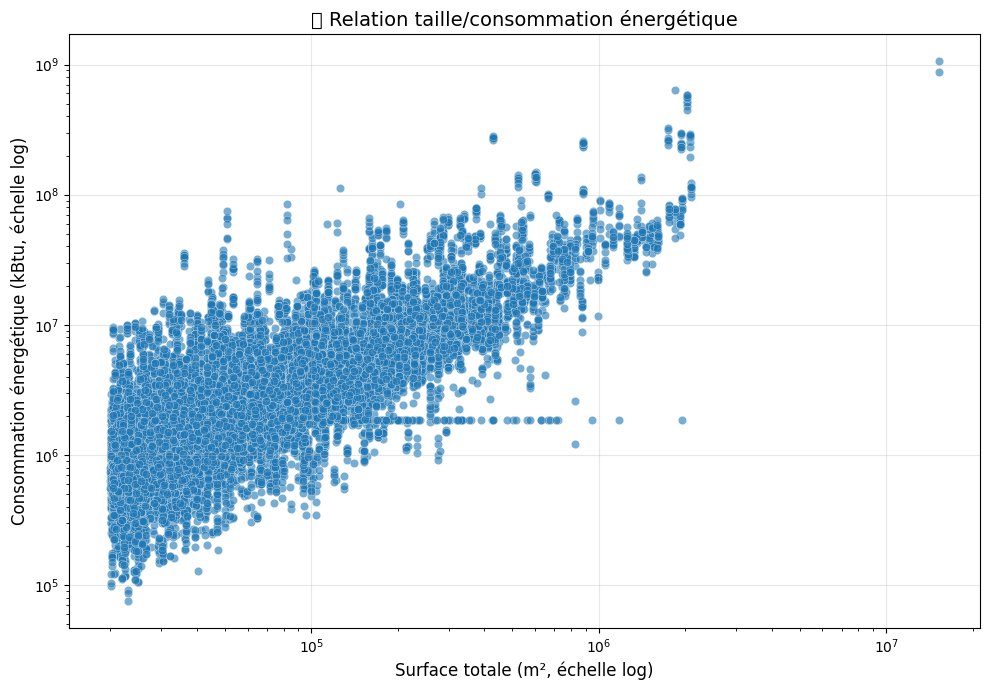

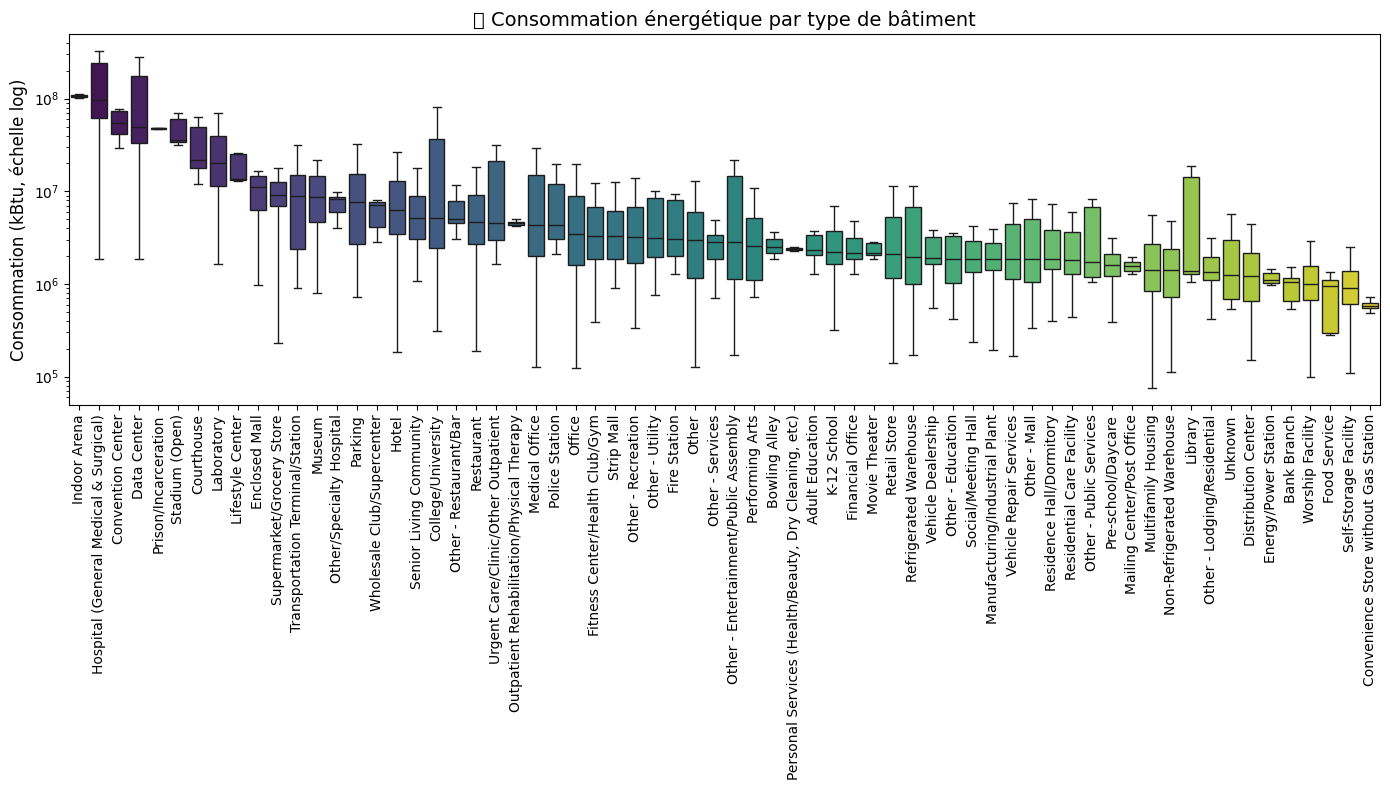

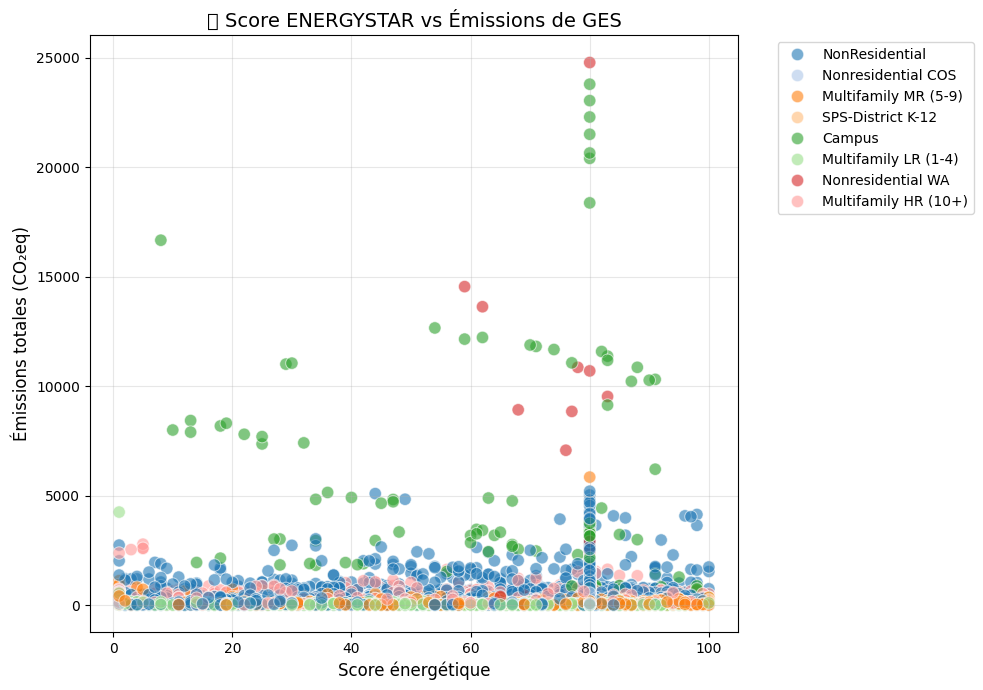

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# D√©sactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1. Matrice de corr√©lation
# ---------------------------
plt.figure(figsize=(14, 10))  # Taille augment√©e
sns.heatmap(
    df.select_dtypes(include=['number']).corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)
plt.title("üìä Matrice de corr√©lation des variables num√©riques", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotation des labels
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Taille vs Consommation
# ---------------------------
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=df,
    x='PropertyGFATotal',
    y='SiteEnergyUse(kBtu)',
    alpha=0.6,
    edgecolor='w',
    linewidth=0.3
)
ax.set(xscale="log", yscale="log")
plt.title("üìä Relation taille/consommation √©nerg√©tique", fontsize=14)
plt.xlabel("Surface totale (m¬≤, √©chelle log)", fontsize=12)
plt.ylabel("Consommation √©nerg√©tique (kBtu, √©chelle log)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Consommation par type de b√¢timent (AM√âLIOR√â)
# ---------------------------
plt.figure(figsize=(14, 8))  # Taille augment√©e

# Tri des types par consommation m√©diane
order = df.groupby('LargestPropertyUseType')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False).index

sns.boxplot(
    data=df,
    x='LargestPropertyUseType',
    y='SiteEnergyUse(kBtu)',
    order=order,
    palette='viridis',
    showfliers=False  # Masque les outliers pour plus de lisibilit√©
)

plt.yscale('log')
plt.title("üìä Consommation √©nerg√©tique par type de b√¢timent", fontsize=14)
plt.xlabel("")
plt.ylabel("Consommation (kBtu, √©chelle log)", fontsize=12)

# Rotation des labels et ajustement de l'espacement
plt.xticks(
    rotation=90,  # Rotation verticale
    ha='center',  # Alignement horizontal
    fontsize=10  # Taille de police r√©duite
)

# Ajustement des marges
plt.subplots_adjust(bottom=0.35)
plt.tight_layout()
plt.show()

# ---------------------------
# 4. Score √©nerg√©tique vs √âmissions
# ---------------------------
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='ENERGYSTARScore',
    y='TotalGHGEmissions',
    alpha=0.6,
    hue='BuildingType',  # Ajout d'une l√©gende cat√©gorielle
    palette='tab20',
    s=80
)
plt.title("üìä Score ENERGYSTAR vs √âmissions de GES", fontsize=14)
plt.xlabel("Score √©nerg√©tique", fontsize=12)
plt.ylabel("√âmissions totales (CO‚ÇÇeq)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # L√©gende d√©port√©e
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()